In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

In [2]:
dataset=pd.read_csv("earthquake_data.csv")
dataset.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [4]:
del dataset["continent"]
del dataset["title"]
del dataset["location"]
del dataset["country"]
del dataset["date_time"]
del dataset["alert"]

In [5]:
dataset

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,7.0,8,7,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596
1,6.9,4,4,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738
2,7.0,3,3,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346
3,7.3,5,5,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129
4,6.6,0,2,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660
778,6.9,5,7,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281
779,7.1,0,7,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170
780,6.8,0,5,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899


In [6]:
dataset.isnull().sum()

magnitude    0
cdi          0
mmi          0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
dtype: int64

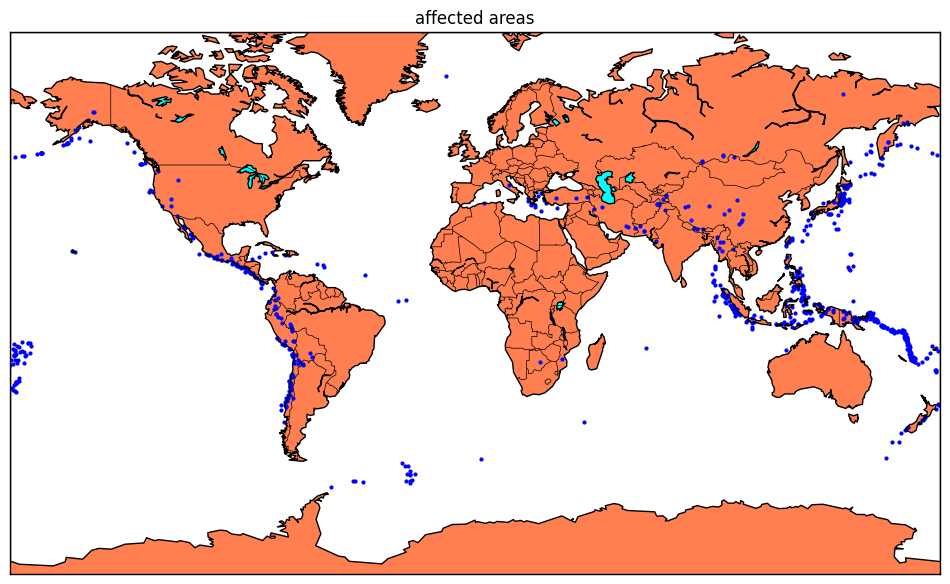

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = dataset["longitude"].tolist()
latitudes = dataset["latitude"].tolist()
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()


In [8]:
#dataset.describe()
dataset.describe(include=['object'])

,net,magType
count,782,782
unique,11,9
top,us,mww
freq,747,468


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
magtype_le = LabelEncoder()
net_le = LabelEncoder()
dataset["magType"]=magtype_le.fit_transform(dataset["magType"])
dataset["net"]=net_le.fit_transform(dataset["net"])
dataset

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,7.0,8,7,1,768,9,117,0.509,17.0,8,14.000,-9.7963,159.596
1,6.9,4,4,0,735,9,99,2.229,34.0,8,25.000,-4.9559,100.738
2,7.0,3,3,1,755,9,147,3.125,18.0,8,579.000,-20.0508,-178.346
3,7.3,5,5,1,833,9,149,1.865,21.0,8,37.000,-19.2918,-172.129
4,6.6,0,2,1,670,9,131,4.998,27.0,8,624.464,-25.5948,178.278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,0,912,9,427,0.000,0.0,7,60.000,13.0490,-88.660
778,6.9,5,7,0,745,0,0,0.000,0.0,5,36.400,56.7744,-153.281
779,7.1,0,7,0,776,9,372,0.000,0.0,6,103.000,-14.9280,167.170
780,6.8,0,5,0,711,9,64,0.000,0.0,7,33.000,6.6310,126.899


In [10]:
dataset.corr()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
magnitude,1.000000,0.209549,0.285552,-0.004726,0.515871,-0.105943,0.113114,-0.091403,-0.110626,0.050542,0.030644,-0.008552,-0.013911
cdi,0.209549,1.000000,0.317937,0.160266,0.479788,-0.073884,-0.175417,0.006554,0.098143,0.243428,-0.097891,0.129003,-0.149048
mmi,0.285552,0.317937,1.000000,-0.147363,0.442423,-0.108195,0.160417,-0.299074,-0.015723,-0.061865,-0.504439,0.144883,-0.005803
tsunami,-0.004726,0.160266,-0.147363,1.000000,-0.015500,-0.015190,-0.600231,0.400752,0.116360,0.340445,0.056814,-0.113209,-0.136778
sig,0.515871,0.479788,0.442423,-0.015500,1.000000,-0.199378,-0.030100,-0.095318,0.114285,0.012673,-0.088667,0.204306,-0.190132
net,-0.105943,-0.073884,-0.108195,-0.015190,-0.199378,1.000000,0.130493,0.097827,-0.148506,0.370464,0.050439,-0.267391,0.262395
nst,0.113114,-0.175417,0.160417,-0.600231,-0.030100,0.130493,1.000000,-0.529371,-0.118812,-0.327961,-0.121982,0.144204,0.173665
dmin,-0.091403,0.006554,-0.299074,0.400752,-0.095318,0.097827,-0.529371,1.000000,-0.021933,0.318009,0.168546,-0.238377,-0.097875
gap,-0.110626,0.098143,-0.015723,0.116360,0.114285,-0.148506,-0.118812,-0.021933,1.000000,-0.291859,-0.111912,0.087756,-0.313623
magType,0.050542,0.243428,-0.061865,0.340445,0.012673,0.370464,-0.327961,0.318009,-0.291859,1.000000,0.107465,-0.210128,0.063004


array([[<Axes: title={'center': 'magnitude'}>,
        <Axes: title={'center': 'cdi'}>, <Axes: title={'center': 'mmi'}>,
        <Axes: title={'center': 'tsunami'}>],
       [<Axes: title={'center': 'sig'}>, <Axes: title={'center': 'net'}>,
        <Axes: title={'center': 'nst'}>,
        <Axes: title={'center': 'dmin'}>],
       [<Axes: title={'center': 'gap'}>,
        <Axes: title={'center': 'magType'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

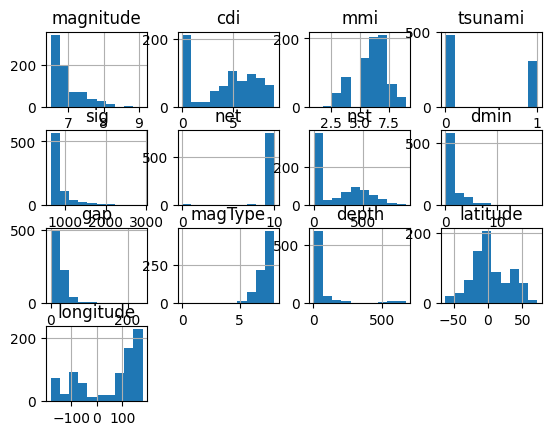

In [11]:
dataset.hist()

In [12]:
x=dataset.iloc[:,[1,2,4,5,6,7,8,9,10,11,12]]
y=dataset.iloc[:,[3]]

In [13]:
print(x)
print(y)

     cdi  mmi  sig  net  nst   dmin   gap  magType    depth  latitude  \
0      8    7  768    9  117  0.509  17.0        8   14.000   -9.7963   
1      4    4  735    9   99  2.229  34.0        8   25.000   -4.9559   
2      3    3  755    9  147  3.125  18.0        8  579.000  -20.0508   
3      5    5  833    9  149  1.865  21.0        8   37.000  -19.2918   
4      0    2  670    9  131  4.998  27.0        8  624.464  -25.5948   
..   ...  ...  ...  ...  ...    ...   ...      ...      ...       ...   
777    0    8  912    9  427  0.000   0.0        7   60.000   13.0490   
778    5    7  745    0    0  0.000   0.0        5   36.400   56.7744   
779    0    7  776    9  372  0.000   0.0        6  103.000  -14.9280   
780    0    5  711    9   64  0.000   0.0        7   33.000    6.6310   
781    0    7  865    9  324  0.000   0.0        7   33.000    6.8980   

     longitude  
0      159.596  
1      100.738  
2     -178.346  
3     -172.129  
4      178.278  
..         ...  
777 

In [14]:
dataset["tsunami"].value_counts()

tsunami
0    478
1    304
Name: count, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [16]:
import joblib
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()#нормалізація
x_scaled=ss.fit_transform(x_data)
joblib.dump(ss, 'standard_scaler.joblib')
print(joblib)

<module 'joblib' from 'C:\\Users\\Godfather\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\joblib\\__init__.py'>


In [17]:
x_scaled

array([[ 1.16145913,  0.78223001, -0.32502338, ..., -0.45758301,
        -0.45811985,  0.92593368],
       [-0.12070591, -1.26470035, -0.42604044, ..., -0.37737221,
        -0.28257302,  0.43753407],
       [-0.44124717, -1.94701047, -0.36481798, ...,  3.66233548,
        -0.83001989, -1.87828562],
       ...,
       [ 0.19983535, -1.26470035, -0.45971279, ...,  0.39561748,
         0.41217534,  0.79622015],
       [-0.44124717,  0.09991989, -0.23931193, ...,  0.69113143,
         1.52981336,  0.92667918],
       [ 0.84091787,  0.09991989,  0.02088352, ..., -0.15229166,
         0.25522929, -1.12537189]])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_data,random_state=11,test_size=0.2)

In [19]:
from sklearn.linear_model import LogisticRegression 
l1=LogisticRegression()
l1.fit(x_train,y_train)

C:\Users\Godfather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [20]:
y_pred=l1.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
ac

83.33333333333334

In [22]:
from sklearn.svm import SVC 
SVM=SVC(kernel="linear",random_state=2)
SVM.fit(x_train,y_train)

C:\Users\Godfather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=2)

In [23]:
y_pred1=SVM.predict(x_test)
y_pred1

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [24]:
ac1=accuracy_score(y_test,y_pred1)*100
ac1

83.33333333333334

In [25]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

C:\Users\Godfather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [26]:
y_pred2=nb.predict(x_test)
y_pred2

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [27]:
ac2=accuracy_score(y_test,y_pred2)*100
ac2

84.89583333333334

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train) 

DecisionTreeClassifier()

In [31]:
y_pred3=dt.predict(x_test)
y_pred3

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [32]:
ac3 = accuracy_score(y_test, y_pred3)*100
ac3

89.58333333333334

In [33]:
from sklearn.ensemble import VotingClassifier

l1 = LogisticRegression()
svm = SVC(probability=True)
nb = GaussianNB()
dt = DecisionTreeClassifier()

# Створюємо VotingClassifier з вбудованими класифікаторами
classifiers = [("logisticRegression", l1),
               ("svm", svm),
               ("naivebayes", nb),
               ("Decision Tree Classification", dt)]

vc = VotingClassifier(estimators=classifiers, voting='soft')

# Навчаємо модель
vc.fit(x_train, y_train)

# Виконуємо прогноз на тестових даних
y_pred = vc.predict(x_test)

# Отримуємо відсотки впевненості для кожного класифікатора
confidence_scores = vc.predict_proba(x_test)

for i, classifier in enumerate(classifiers):
    classifier_name, clf = classifier
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    confidence_scores = clf.predict_proba(x_test)
    print(f"Confidence score for {classifier_name}: {confidence_scores}")

Confidence score for logisticRegression: [[0.2325479  0.7674521 ]
 [0.84708208 0.15291792]
 [0.97099817 0.02900183]
 [0.95962086 0.04037914]
 [0.18747189 0.81252811]
 [0.89296288 0.10703712]
 [0.7652148  0.2347852 ]
 [0.79718453 0.20281547]
 [0.31434875 0.68565125]
 [0.84451638 0.15548362]
 [0.85895958 0.14104042]
 [0.20103301 0.79896699]
 [0.67315908 0.32684092]
 [0.79308452 0.20691548]
 [0.92723052 0.07276948]
 [0.14615002 0.85384998]
 [0.54050958 0.45949042]
 [0.76718328 0.23281672]
 [0.11117616 0.88882384]
 [0.10651179 0.89348821]
 [0.15487978 0.84512022]
 [0.12983795 0.87016205]
 [0.99370621 0.00629379]
 [0.09767783 0.90232217]
 [0.97082076 0.02917924]
 [0.95953691 0.04046309]
 [0.28105773 0.71894227]
 [0.18772098 0.81227902]
 [0.75356768 0.24643232]
 [0.13341321 0.86658679]
 [0.13178867 0.86821133]
 [0.13542334 0.86457666]
 [0.99187273 0.00812727]
 [0.94755585 0.05244415]
 [0.50672465 0.49327535]
 [0.06657389 0.93342611]
 [0.13275303 0.86724697]
 [0.07573771 0.92426229]
 [0.99598

C:\Users\Godfather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Godfather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\Godfather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Godfather\AppData\Local\Programs\Python\Python311\Lib\site-

In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

l1 = LogisticRegression()
svm = SVC(probability=True)
nb = GaussianNB()
dt = DecisionTreeClassifier()

classifiers = [("logisticRegression", l1),
("svm", svm),
("naivebayes", nb),
("Decision Tree Classification", dt)]

weights = [1, 1, 1, 2] # Призначаємо ваги для кожного класифікатора

vc = VotingClassifier(estimators=classifiers, voting='soft', weights=weights)

vc.fit(x_train, y_train)

y_pred = vc.predict(x_test)

confidence_scores = vc.predict_proba(x_test)

for i, classifier in enumerate(classifiers):
    classifier_name, clf = classifier
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    confidence_scores = clf.predict_proba(x_test)
    print(f"Confidence score for {classifier_name}: {confidence_scores}")
    
joblib.dump(vc, 'voting_classifier_model.joblib')

Confidence score for logisticRegression: [[0.22857533 0.77142467]
 [0.86916172 0.13083828]
 [0.97639784 0.02360216]
 [0.98991751 0.01008249]
 [0.16846083 0.83153917]
 [0.91170925 0.08829075]
 [0.83038665 0.16961335]
 [0.81140095 0.18859905]
 [0.37675361 0.62324639]
 [0.89589614 0.10410386]
 [0.91373687 0.08626313]
 [0.22505414 0.77494586]
 [0.69889513 0.30110487]
 [0.81016199 0.18983801]
 [0.96712727 0.03287273]
 [0.15703808 0.84296192]
 [0.60772009 0.39227991]
 [0.68548769 0.31451231]
 [0.16401912 0.83598088]
 [0.11040868 0.88959132]
 [0.09967862 0.90032138]
 [0.1081493  0.8918507 ]
 [0.99587728 0.00412272]
 [0.40354863 0.59645137]
 [0.98405096 0.01594904]
 [0.98214859 0.01785141]
 [0.33291972 0.66708028]
 [0.17294856 0.82705144]
 [0.79143188 0.20856812]
 [0.13769677 0.86230323]
 [0.1407747  0.8592253 ]
 [0.14779073 0.85220927]
 [0.99667153 0.00332847]
 [0.96163342 0.03836658]
 [0.5158113  0.4841887 ]
 [0.2945445  0.7054555 ]
 [0.12108013 0.87891987]
 [0.07465341 0.92534659]
 [0.99740

C:\Users\Godfather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Godfather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\Godfather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Godfather\AppData\Local\Programs\Python\Python311\Lib\site-

['voting_classifier_model.joblib']

In [34]:
y_pred4=vc.predict(x_test)
y_pred4

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
ac4=accuracy_score(y_test,y_pred4)*100
ac4

84.89583333333334

KFold(n_splits=5, random_state=None, shuffle=False)

In [36]:
from sklearn.model_selection import cross_val_predict
cross_pred=cross_val_predict(vc,x_test,y_test,cv=kf)
cross_pred

NameError: name 'kf' is not defined

In [37]:
from sklearn.model_selection import cross_val_score

cross_score=cross_val_score(vc,x_train,y_train,cv=kf)
cross_score

NameError: name 'kf' is not defined

In [38]:
ac5=cross_score.mean()*100
ac5

NameError: name 'cross_score' is not defined

In [39]:
ss = joblib.load('standard_scaler.joblib')

x_scaled = ss.transform(x_data)
print(x_scaled)

[[ 1.16145913  0.78223001 -0.32502338 ... -0.45758301 -0.45811985
   0.92593368]
 [-0.12070591 -1.26470035 -0.42604044 ... -0.37737221 -0.28257302
   0.43753407]
 [-0.44124717 -1.94701047 -0.36481798 ...  3.66233548 -0.83001989
  -1.87828562]
 ...
 [ 0.19983535 -1.26470035 -0.45971279 ...  0.39561748  0.41217534
   0.79622015]
 [-0.44124717  0.09991989 -0.23931193 ...  0.69113143  1.52981336
   0.92667918]
 [ 0.84091787  0.09991989  0.02088352 ... -0.15229166  0.25522929
  -1.12537189]]


In [40]:
import joblib


# Завантажте модель
model = joblib.load('voting_classifier_model.joblib')

# Використовуйте модель для прогнозування або інших операцій
predictions = model.predict(x_test)
print(predictions)

[1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1
 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1
 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0
 1 0 0 0 0 1 0]


In [41]:
dataset=pd.read_csv("earthquake_data.csv")
dataset
del dataset["continent"]
del dataset["title"]
del dataset["location"]
del dataset["country"]
del dataset["date_time"]
del dataset["alert"]

le=LabelEncoder()
magtype_le = LabelEncoder()
net_le = LabelEncoder()
dataset["magType"]=magtype_le.fit_transform(dataset["magType"])
dataset["net"]=net_le.fit_transform(dataset["net"])

x=dataset.iloc[:,[1,2,4,5,6,7,8,9,10,11,12]]
y=dataset.iloc[:,[3]]

x_scaled = ss.transform(x)

confidence_scores = model.predict_proba(x_scaled)
print(confidence_scores)



[[0.19884193 0.80115807]
 [0.51472563 0.48527437]
 [0.16478771 0.83521229]
 ...
 [0.99103623 0.00896377]
 [0.80692043 0.19307957]
 [0.97758536 0.02241464]]


In [42]:
print(x)

     cdi  mmi  sig  net  nst   dmin   gap  magType    depth  latitude  \
0      8    7  768    9  117  0.509  17.0        8   14.000   -9.7963   
1      4    4  735    9   99  2.229  34.0        8   25.000   -4.9559   
2      3    3  755    9  147  3.125  18.0        8  579.000  -20.0508   
3      5    5  833    9  149  1.865  21.0        8   37.000  -19.2918   
4      0    2  670    9  131  4.998  27.0        8  624.464  -25.5948   
..   ...  ...  ...  ...  ...    ...   ...      ...      ...       ...   
777    0    8  912    9  427  0.000   0.0        7   60.000   13.0490   
778    5    7  745    0    0  0.000   0.0        5   36.400   56.7744   
779    0    7  776    9  372  0.000   0.0        6  103.000  -14.9280   
780    0    5  711    9   64  0.000   0.0        7   33.000    6.6310   
781    0    7  865    9  324  0.000   0.0        7   33.000    6.8980   

     longitude  
0      159.596  
1      100.738  
2     -178.346  
3     -172.129  
4      178.278  
..         ...  
777 

In [49]:
zrazok = [[8, 7, 768, 9, 117, 0.3, 17, 8, 14.000, -9.7963, 159.596]]
#zrazok = [[0, 7, 856, 9, 324, 0.000, 0.0, 7, 33.000, 6.8980, 126.579]]

In [50]:
x_scaled = ss.transform(zrazok)

confidence_scores = model.predict_proba(x_scaled)
print(confidence_scores)

[[0.20376656 0.79623344]]


C:\Users\Godfather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
